In [0]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

from collections import OrderedDict
import sklearn as sk
from sklearn.metrics import confusion_matrix

In [0]:
class confusionMatrix:
  
    def __init__(self, real, predicted, labels):
        
        self.real = real
        self.predicted = predicted
        self.labels = labels # = k
        self.mainArray = confusion_matrix(self.real, self.predicted, self.labels)
        
        confusionMatrix.calcParameters(self)
        
        confusionMatrix.accCalc(self)
    
    def calcParameters(self):
        
        self.hits = 0
        self.n = 0
        for i in range(0, len(self.mainArray)):
            self.hits += self.mainArray[i,i]
            for j in range(0, len(self.mainArray)):
                self.n += self.mainArray[i,j]
                
    def accCalc(self):
        self.accuracy = self.hits/self.n
        self.error = 1 - self.accuracy
        
    def log(self):
        print('real      : ', self.real)
        print('predicted : ', self.predicted)
        print('labels    : ', self.labels)
        print('--Confusion matrix--')
        print(self.mainArray)
        print('accuracy  : ', self.accuracy)
        print('error     : ', self.error)
        confusionMatrix.draw(self,)
        
    def draw(self):
      
      def plot(cm,
               target_names,
               title='Confusion matrix',
               cmap=None,
               normalize=False):
      
        import itertools
        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
      
      plot(self.mainArray, self.labels)
     

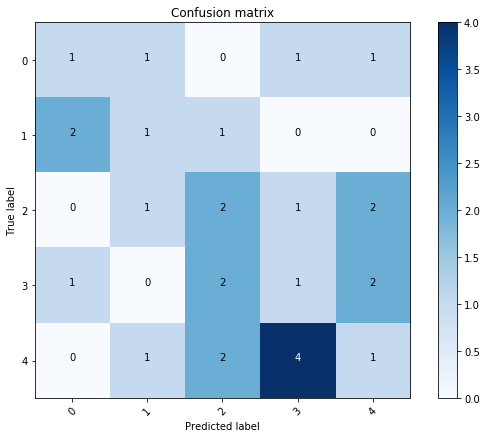

real      :  [1, 2, 4, 3, 3, 3, 4, 0, 1, 2, 4, 3, 1, 4, 2, 2, 3, 0, 0, 0, 4, 4, 2, 4, 2, 4, 1, 3]
predicted :  [0, 1, 3, 4, 0, 2, 3, 4, 2, 2, 3, 4, 1, 3, 2, 4, 2, 3, 0, 1, 1, 2, 3, 4, 4, 2, 0, 3]
labels    :  [0, 1, 2, 3, 4]
--Confusion matrix--
[[1 1 0 1 1]
 [2 1 1 0 0]
 [0 1 2 1 2]
 [1 0 2 1 2]
 [0 1 2 4 1]]
accuracy  :  0.21428571428571427
error     :  0.7857142857142857


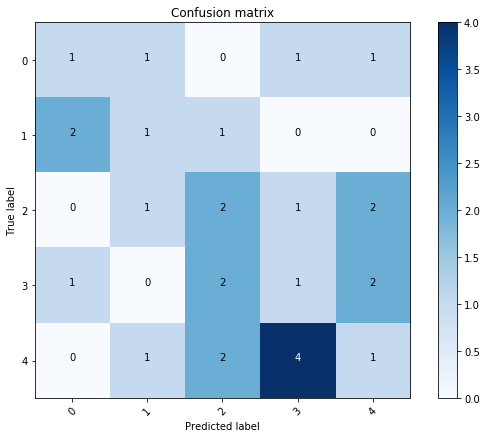

In [62]:
ccc = confusionMatrix([1,2,4,3,3,3,4,0,1,2,4,3,1,4,2,2,3,0,0,0,4,4,2,4,2,4,1,3],
                      [0,1,3,4,0,2,3,4,2,2,3,4,1,3,2,4,2,3,0,1,1,2,3,4,4,2,0,3],
                      [0,1,2,3,4])

ccc.draw()
ccc.log()
